In [3]:
import casestudy_tools as tools
df = tools.preprocess()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 37 columns):
AGE                    22223 non-null float64
BILL                   22223 non-null float64
ORGYN                  22223 non-null int64
AFFL                   22223 non-null int64
LTIME                  22223 non-null float64
GENDER_F               22223 non-null uint8
GENDER_M               22223 non-null uint8
GENDER_U               22223 non-null uint8
TV_REG_Border          22223 non-null uint8
TV_REG_C Scotland      22223 non-null uint8
TV_REG_East            22223 non-null uint8
TV_REG_London          22223 non-null uint8
TV_REG_Midlands        22223 non-null uint8
TV_REG_N East          22223 non-null uint8
TV_REG_N Scot          22223 non-null uint8
TV_REG_N West          22223 non-null uint8
TV_REG_S & S East      22223 non-null uint8
TV_REG_S West          22223 non-null uint8
TV_REG_Ulster          22223 non-null uint8
TV_REG_Wales & West    22223 non-null uint8
TV_RE

<h1>Data PreProcessing</h1>

In [4]:
import pandas as pd
df = pd.read_csv("datasets/organics.csv")
#df.dtypes

In [64]:
df = df.drop(['CUSTID', 'LCDATE', 'ORGANICS', 'AGEGRP1', 'AGEGRP2'], axis = 1)
df = df.drop(['NEIGHBORHOOD'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 12 columns):
GENDER    19711 non-null object
DOB       22223 non-null object
EDATE     22223 non-null object
AGE       20715 non-null float64
TV_REG    21758 non-null object
NGROUP    21549 non-null object
BILL      22223 non-null float64
REGION    21758 non-null object
CLASS     22223 non-null object
ORGYN     22223 non-null int64
AFFL      21138 non-null float64
LTIME     21942 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 2.0+ MB


In [65]:
# Calculates the years between DOB and EDATE and adds that value to age for missing values.
from datetime import datetime
import numpy as np
dateformat = '%Y-%m-%d'
edate = pd.Timestamp(df['EDATE'][0])
df['DOB'] = pd.to_datetime(df['DOB'], format=dateformat)    # 1
df['DOB'] = df['DOB'].where(df['DOB'] < edate, df['DOB'] -  np.timedelta64(100, 'Y'))   # 2
df['AGE'] = (edate - df['DOB']).astype('<m8[Y]')    # 3

df['AGE']
df = df.drop(['EDATE', 'DOB'], axis = 1)
#df.info()

In [66]:
# denote errorneous values in AFFL column. Should be on scale 1-30.
mask = df['AFFL'] < 1
df.loc[mask, 'AFFL'] = 1
mask = df['AFFL'] > 30
df.loc[mask, 'AFFL'] = 30

# Fill mean values for AFFL column.
df['AFFL'].fillna(df['AFFL'].mean(), inplace=True)
# Convert the scale to integer. Not sure if this is necessary.
df['AFFL'] = df['AFFL'].astype(int)
#df.info()
#df['AFFL'].value_counts(bins=8)
#sorted(df['AFFL'].unique())

In [74]:
# Fills mean values based on age for loyalty time. 
means = df.groupby(['AGE'])['LTIME'].mean()
df = df.set_index(['AGE'])
df['LTIME'] = df['LTIME'].fillna(means)
df = df.reset_index()


,AGE,DOB,BILL,ORGYN,AFFL,LTIME,GENDER_F,GENDER_M,GENDER_U,TV_REG_Border,...,NGROUP_U,REGION_Midlands,REGION_North,REGION_Scottish,REGION_South East,REGION_South West,CLASS_Gold,CLASS_Platinum,CLASS_Silver,CLASS_Tin
0,76.0,1921-09-16,16000.00,0,10,4.0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,49.0,1949-02-12,6000.00,0,4,5.0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,70.0,1927-11-27,0.02,1,5,8.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,65.0,1932-04-10,0.01,1,10,7.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,68.0,1929-05-21,0.01,0,11,8.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,72.0,1926-02-16,20759.81,0,9,3.0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
6,74.0,1923-10-07,0.01,0,11,8.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7,62.0,1935-12-03,0.01,0,13,5.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8,61.0,1936-03-07,2038.76,0,10,3.0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
9,43.0,1954-09-24,6000.00,1,14,1.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [68]:
df['GENDER'].fillna('U', inplace=True)
#df['GENDER'].unique()

In [70]:
df = pd.get_dummies(df)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 37 columns):
AGE                    22223 non-null float64
BILL                   22223 non-null float64
ORGYN                  22223 non-null int64
AFFL                   22223 non-null int64
LTIME                  22223 non-null float64
GENDER_F               22223 non-null uint8
GENDER_M               22223 non-null uint8
GENDER_U               22223 non-null uint8
TV_REG_Border          22223 non-null uint8
TV_REG_C Scotland      22223 non-null uint8
TV_REG_East            22223 non-null uint8
TV_REG_London          22223 non-null uint8
TV_REG_Midlands        22223 non-null uint8
TV_REG_N East          22223 non-null uint8
TV_REG_N Scot          22223 non-null uint8
TV_REG_N West          22223 non-null uint8
TV_REG_S & S East      22223 non-null uint8
TV_REG_S West          22223 non-null uint8
TV_REG_Ulster          22223 non-null uint8
TV_REG_Wales & West    22223 non-null uint8
TV_RE

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d747cf8>,
      dtype=object)

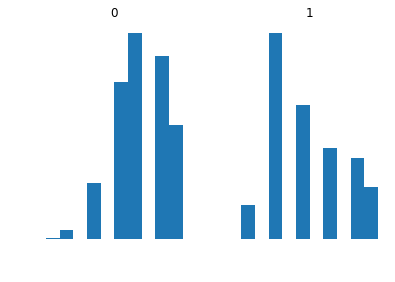

In [5]:
import matplotlib.pyplot as plt
# Sets the color to white.
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

%matplotlib inline
#df.boxplot(column='REGION', by='ORGYN')
df.hist(column='AGEGRP2', by='ORGYN')

In [99]:
print(df['ORGANICS'].unique())

[0 1 2 3]


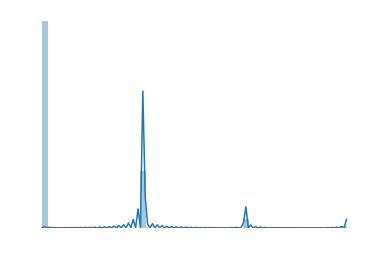

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sets the color to white.
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

g = sns.distplot(df['ORGANICS'].dropna())
plt.show()

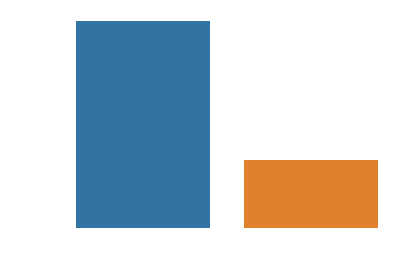

       CUSTID  GENDER    DOB  EDATE  AGE  AGEGRP1  AGEGRP2  TV_REG  NGROUP  \
ORGYN                                                                        
0       16718       3  10507      1   62        4        7      13       7   
1        5505       3   4653      1   60        3        6      13       7   

       NEIGHBORHOOD  LCDATE  ORGANICS  BILL  REGION  CLASS  ORGYN  AFFL  LTIME  
ORGYN                                                                           
0                55    3240         1  2169       5      4      1    21     39  
1                55    1879         3   746       5      4      1    31     35  


In [14]:
g = sns.countplot(data = df, x = 'ORGYN')
plt.show()
print(df.groupby('ORGYN').nunique())

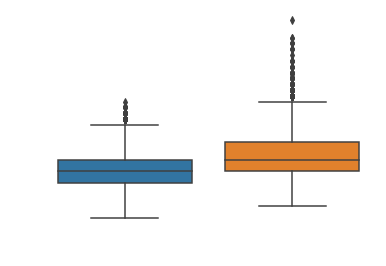

In [8]:
g = sns.boxplot(x='ORGYN', y='AFFL', data=df)
plt.show()

In [188]:
df_corr = df.groupby(['AFFL'])['ORGYN'].value_counts()
df_corr

AFFL  ORGYN
0.0   0           6
1.0   0          36
2.0   0         190
      1          10
3.0   0         488
      1          45
4.0   0         909
      1          74
5.0   0        1490
      1         172
6.0   0        1931
      1         303
7.0   0        2191
      1         397
8.0   0        2136
      1         498
9.0   0        1979
      1         605
10.0  0        1586
      1         586
11.0  0        1143
      1         533
12.0  0         778
      1         463
13.0  0         468
      1         388
14.0  1         312
      0         282
15.0  1         237
      0         166
16.0  1         167
      0          78
17.0  1         105
      0          40
18.0  1          70
      0          19
19.0  1          63
      0           8
20.0  1          58
      0           1
21.0  1          36
22.0  1          25
23.0  1          17
24.0  1          15
25.0  1          13
26.0  1           6
27.0  1           5
28.0  1           1
29.0  1           3
30.0  1 